In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [2]:
directory = r'C:\Users\USER\OneDrive\Documents\dataset\Brain_Data_Organised'

categories = ['Normal', 'Stroke']

In [3]:
#loop through categories of image
image_size = 64

array_category = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)
    for image in os.listdir(folder):
        image_path = os.path.join(folder,image)
        img_array = cv2.imread(image_path)
        img_array = cv2.resize(img_array,(image_size, image_size))
        array_category.append([img_array, label])
        #plt.imshow(img_array)
        #print(array_category)
#convert image to array


In [4]:
len(array_category)

2501

In [5]:
random.shuffle(array_category)

print(array_category[0])

[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  2,   2,   2],
        [249, 249, 249],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  2,   2,   2],
        [236, 236, 236],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]

In [6]:
X = []
y = [] 

for features, labels in array_category:
    X.append(features)
    y.append(labels)

In [7]:
len(y)

2501

In [8]:
X = np.array(X)
y = np.array(y)

In [9]:
#print(y)

In [12]:
X = X/255

In [13]:
X.shape

(2501, 64, 64, 3)

In [25]:
split = round(len(array_category) * 0.90)
print(split)

2251


In [26]:
X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

print(len(X_train), len(y_train), len(X_test), len(y_test))

2251 2251 250 250


In [27]:
#model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [28]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(MaxPooling2D((2,2)))

#model.add(Conv2D(64, (3,3), activation='relu'))
#model.add(MaxPooling2D((2,2)))

model.add(Dropout(rate=0.2))
model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train,  epochs=5, validation_split=0.1, batch_size=16)

Epoch 1/5
127/127 [==============================] - 15s 109ms/step - loss: 0.5289 - accuracy: 0.7402 - val_loss: 0.3993 - val_accuracy: 0.8451
Epoch 2/5
127/127 [==============================] - 13s 105ms/step - loss: 0.2295 - accuracy: 0.9165 - val_loss: 0.1999 - val_accuracy: 0.9248
Epoch 3/5
127/127 [==============================] - 14s 113ms/step - loss: 0.1075 - accuracy: 0.9610 - val_loss: 0.1641 - val_accuracy: 0.9336
Epoch 4/5
127/127 [==============================] - 15s 117ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.1307 - val_accuracy: 0.9513
Epoch 5/5
127/127 [==============================] - 14s 111ms/step - loss: 0.0354 - accuracy: 0.9881 - val_loss: 0.1236 - val_accuracy: 0.9513


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 61504)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                1968160   
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                      

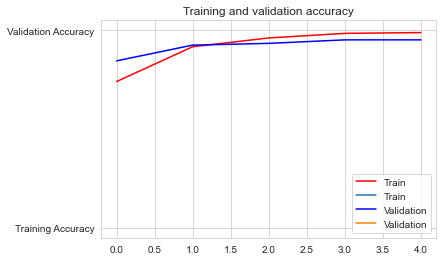

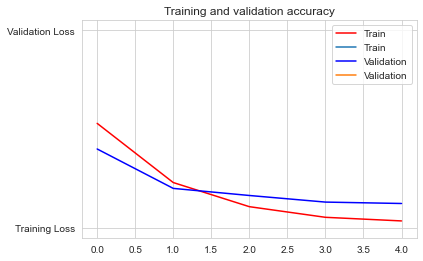

In [32]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy", label='Train')
plt.plot(epochs, val_acc, 'b', "Validation Accuracy", label='Validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss", label='Train')
plt.plot(epochs, val_loss, 'b', "Validation Loss", label='Validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test,  verbose=1)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

8/8 [==============================] - 0s 37ms/step - loss: 0.1129 - accuracy: 0.9640

Test accuracy: 0.9639999866485596

Test loss: 0.11286532878875732


In [34]:
pred = model.predict(X_test)
y_pred = []
for i in range(len(pred)):
    y_pred.append(np.rint(pred[i][0]))
    
y_pred = np.array(y_pred)

8/8 [==============================] - 0s 37ms/step


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

cr = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Classification Report\n',cr)
print('Confusion Matrix\n', cm)

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       156
           1       0.97      0.94      0.95        94

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

Confusion Matrix
 [[153   3]
 [  6  88]]


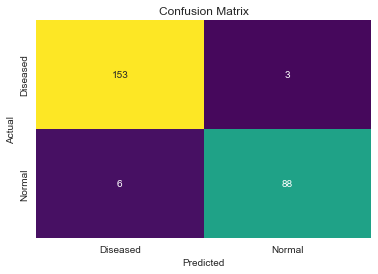

In [37]:
import seaborn as sns

fig, ax = plt.subplots()
sns.set_style('whitegrid')

sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='viridis', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Diseased'
labels[1] = 'Normal'

labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y[0] = 'Diseased'
labels_y[1] = 'Normal'

ax.set_xticklabels(labels)
ax.set_yticklabels(labels_y)
plt.show()